#### summary
- 1차원: 분산(데이터가 얼마나 떨어져있는지), 공분산, 표준편차, 최빈값, 평균, 중앙값, 4분위수, 최대, 최소값 이런 것들을 통계량이라고 함.(표본)
 => 통계가 데이터를 분석하는데 어떻게 쓰이는지 설명할 수 있다.
데이터의 구성을 볼 수 있는 것: 4분위수, 최대/최소값
위의 모든 것들이 기술통계.


- 2차원: 하나의 변수가 아닌 두개의 변수 - 공분산(음/양의 방향,0)
공분산은 방향은 알 수 있지만 얼만큼 상관이 있는지 모름 -> 상관계수 필요.
상관계수는 표준편차로 나눠주면 된다. Z(표준화)

데이터를 탐색하는데 어떻게 쓰이는지 알아야 한다.!!

#### 1차원 데이터

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
# 시리즈형태
scores = df.english[:10]
scores

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
Name: english, dtype: int64

In [4]:
# 배열형태
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
scores_df1 = pd.DataFrame({'score':scores},index=list('ABCDEFGHIJ'))
scores_df1
# 이건 걍 df로 만드는거고, 인덱스에 이름을 지어주기 위해선 아래 방법으로

,score
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65
J,58


In [6]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df
# 인덱스(Index)함수 사용. i는 대문자임 ㅋ -> 인덱스 이름 만들 수 있음!!

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


ages_df.index = list('ABCDEFGHIJ')


ages_df.index.name = 'passenger'

따로 추가하기~!!

In [7]:
# 평균값 <- 배열사용
sum(scores)/len(scores)

55.0

In [8]:
# 평균값 <- 넘파이사용
np.mean(scores)

55.0

In [9]:
# 평균값 <- 데이터프레임사용
scores_df.mean()

score    55.0
dtype: float64

In [10]:
# 중앙값
np.median(scores)
# scores_df.median()

56.5

In [11]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [12]:
# 짝수일 때 median값 뽑을 수 있는 코드
# 내가 생각한 코드
n= len(sorted_scores)

if n%2 ==0:
    a= (sorted_scores[4]+sorted_scores[5])/2
    
    # 인덱스 번호를 줘버리면 기본 리스트의 값과 연동 불가!!
    
else:
    print(np.median(sorted_scores))

In [13]:
# 선생님 풀이
# **** median 값 뽑는 코드 ****

n=len(sorted_scores)
if n%2 ==0:
    m0 = sorted_scores[n//2 -1] #가운데친구들
    m1 = sorted_scores[n//2]    #가운데친구들
    median = (m0+m1) / 2        #더해서 나누기 2
    
else:
    median = sorted_scores[(n+1)//2-1]  # 홀수일 경우
    
median

56.5

In [16]:
# 최빈값
print(scores_df.mode())

   score
0     65


In [15]:
pd.Series(sorted_scores).mode()

0    65
dtype: int64

In [15]:
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<AxesSubplot:xlabel='score', ylabel='Density'>

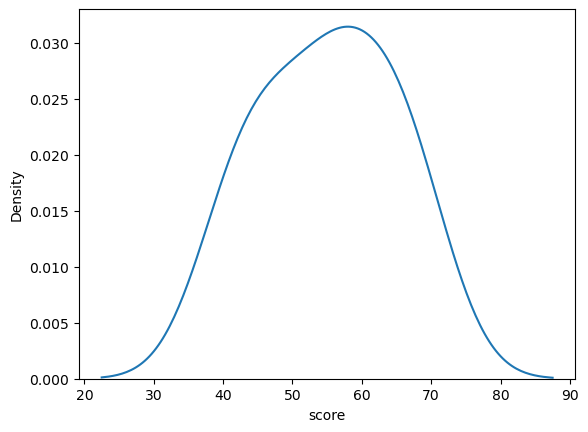

In [16]:
import seaborn as sns
sns.kdeplot(data=scores_df, x='score')
# 이러한 분포로 된 걸 알 수 있다.

<AxesSubplot:xlabel='score', ylabel='Count'>

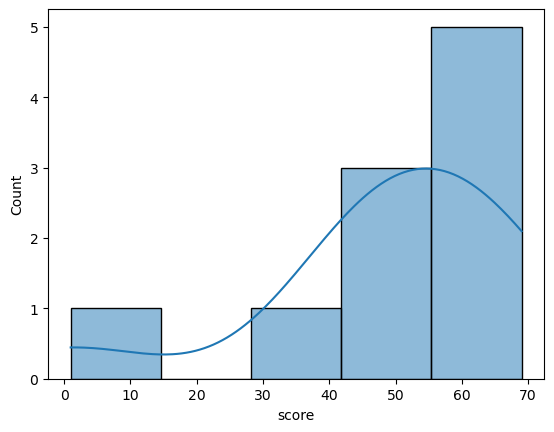

In [17]:
# 만약에 다른 극단적인 큰 수가 들어가면?
# 큰 수가 있으니까 평균이 중앙값보다 오른쪽에 있다.
# 반대로 극단적인 작은 수가 들어가면 평균이 중앙값보다 왼쪽에있다..
scores_df.iloc[9,0] =1
sns.histplot(data=scores_df, x='score',kde=True)

In [18]:
scores_df.describe()

,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


In [19]:
# 데이터의 산포도 지표
# 분산과 표준편차

mean = np.mean(scores)
print(mean)
print(scores)

# deviation 편차: 데이터셋에 있어서 원소와 평균의 차이
# 편차의 합은 항상 0이다.
deviation = scores - mean
print(deviation)

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [20]:
sum(deviation)
np.mean(deviation)

0.0

In [21]:
# 편차의 합이 다 0이 되버리니까 분산개념을 생각한다.
# 편차를 제곱해주는게 분산
# 분산은 제곱했으므로 과장됨 
# -> 실제값으로 바꾸기 위해 루트를 씌워주는게 표준편차.

#### 분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산. 
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨
 
 [표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [22]:
# 넘파이 표본분산(default)
np.mean(deviation **2)
np.var(scores)

86.0

In [23]:
# 넘파이 불편분산
np.var(scores,ddof=1)

95.55555555555556

In [24]:
# 판다스 불편분산(default)
scores_df.var()

score    382.455556
dtype: float64

In [25]:
# 판다스 표본분산
scores_df.var(ddof=0)

score    344.21
dtype: float64

In [26]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [27]:
# 표준편차 (넘파이에서 루트씌우는 게 sqrt)
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [28]:
np.std(scores,ddof=0)

9.273618495495704

In [29]:
# 범위와 4분위수
# 범위 (제일 큰 수에서 작은 수 빼기)
np.max(scores) - np.min(scores)

28

In [30]:
scores_q1 = np.percentile(scores,25)
scores_q3 = np.percentile(scores,75)

scores_q3 - scores_q1

15.0

In [31]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [32]:
# 데이터의 정규화
print(scores)
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

[42 69 56 41 57 48 65 49 65 58]
평균: 55.0, 표준편차: 9.2736


In [33]:
# 표준화 (데이터 분포를, 평균0, 표준편차가 1인 형태로 변경)
# 데이터의 스케일을 변경하지만 데이터의 관계는 유지한다.

#### Z = (X - μ) / σ
#### 표준화 = 편차(원소-평균값) / 표준편차 이다!!!

In [34]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [35]:
# 역으로 구해보자
55.0 + z*scores.std()

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

In [36]:
# 데이터의 시각화

e_scores = np.array(df.english)
pd.Series(e_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [37]:
# 도수분포표 보기 (넘파이에서 제공하는 히스토그램 사용, _는 무시하는 것.)
freq,_=np.histogram(e_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

np.histogram() 함수는 히스토그램을 생성할 때, 구간(bin)의 개수와 구간의 범위를 설정하며, 두 개의 값을 반환합니다. 첫 번째 값은 구간별 빈도수(frequency)를 나타내는 1차원 배열이고, 두 번째 값은 구간(bin) 정보를 나타내는 1차원 배열입니다.

하지만, 두 번째 반환값인 구간 정보 배열이 사용되지 않는 경우가 있습니다. 이 때, 구간 정보 배열 대신에 언더스코어(_)를 사용하여 해당 값이 무시되도록 처리할 수 있습니다.

따라서, 위의 코드에서 _는 필수적인 값은 아니지만, 두 번째 반환값인 구간 정보 배열이 사용되지 않으므로, 언더스코어를 사용하여 무시하는 것이 일반적입니다

In [38]:
# 이렇게!!
freq,bins=np.histogram(e_scores, bins=10, range=(0,100))
freq,bins

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [39]:
# 구간만들기 간편한 for문
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

# dataframe 만들어주기
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class, name='class'))
freq_dist_df
# 이게 도수분포표!!!!

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


<AxesSubplot:xlabel='frequency', ylabel='Count'>

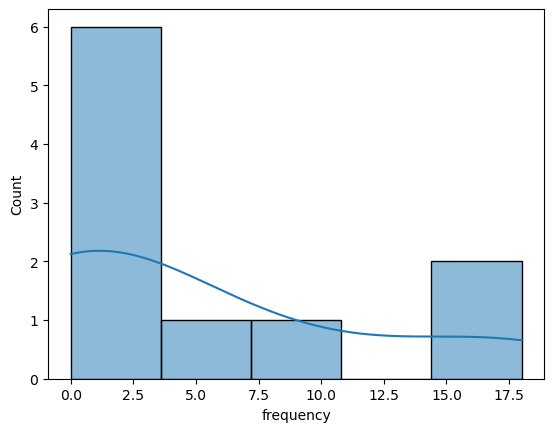

In [40]:
sns.histplot(data=freq_dist_df, x='frequency', kde=True)

In [41]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value


[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [42]:
# 상대도수 : 해당 계급 데이터의 상대적인 비율

rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

rel_freq에서 rel은 "relative(상대적인)"의 약어로, 상대도수(relative frequency)를 나타냅니다. 상대도수는 특정한 값이 전체 값 중에서 차지하는 비율을 나타내는데, 전체 값의 크기에 관계없이 상대적인 비율을 살펴볼 수 있게 합니다. 예를 들어, 전체 학생 중에서 60명이 수학시험에서 80점 이상을 받았다면, 상대도수는 60명 / 전체 학생 수 로 계산할 수 있습니다. 이때, 상대도수를 통해 80점 이상을 받은 학생이 전체 학생 중에서 어느 정도 비중을 차지하는지를 살펴볼 수 있습니다.

In [43]:
print(freq)
rel_freq = freq / freq.sum()
print(rel_freq)

[ 0  0  0  2  8 16 18  6  0  0]
[0.   0.   0.   0.04 0.16 0.32 0.36 0.12 0.   0.  ]


In [44]:
# 누적 상대도수 : 해당 계급까지의 상대도수의 합/ cum: 무게
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [45]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq #상대도수
freq_dist_df['cumulative_frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value', 'frequency', 'relative_frequency', 'cumulative_frequency']]
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [46]:
# 최빈값 (데이터프레임에서 최빈값 뽑는 법)
freq_dist_df.loc[freq_dist_df.frequency.idxmax(),'class_value']
# 프리퀀시에서 가장 큰 행, classvalue는 열이죠, 18이 여기서 나오잖아?
# 그것의 열의 값이 65니까 65가 나오겠죠?


65

freq,_ = np.histogram(e_scores, bins=10, range=(0,100))  이거랑


freq,_,_=plt.hist(e_scores, bins=10,range=(0,100))

두 코드가 다르구나,,, 그랫구나,,,,

2번 언더스코어 하나만 하면 오류뜨면서 돌아감



두 식은 모두 히스토그램을 생성하는 데 사용됩니다.

첫 번째 식에서는 NumPy의 np.histogram() 함수를 사용하여 주어진 데이터(e_scores)의 히스토그램을 계산합니다. 함수는 먼저 데이터를 주어진 범위(range)와 구간(bins)으로 나눕니다. 각 구간에 속한 데이터의 개수를 계산하여 freq 배열에 저장하고, 구간 정보를 담은 bins 배열을 반환합니다. 이때 반환된 bins 배열은 freq 배열보다 하나 더 큰 크기를 가집니다. 두 번째 반환값인 _는 bins 배열과 같은 값을 반환하며, 이를 무시하기 위해 _ 변수에 할당합니다.

두 번째 식에서는 matplotlib 라이브러리의 plt.hist() 함수를 사용하여 데이터의 히스토그램을 그립니다. 이 함수는 먼저 np.histogram() 함수와 같이 주어진 데이터를 구간으로 나누어 각 구간에 속한 데이터의 개수를 계산합니다. 그런 다음 이를 시각화하여 히스토그램을 그립니다. bins 매개변수는 데이터를 나눌 구간의 개수를 지정하며, range 매개변수는 데이터의 범위를 지정합니다. 반환값으로는 구간별 빈도수를 담은 freq 배열, 구간 정보를 담은 bins 배열, 각 구간에 해당하는 경계 값을 담은 patches 객체가 반환됩니다. 이때 _ 변수는 반환값 중에서 빈도수와 경계 값을 사용하지 않기 때문에, _ 변수에 할당하여 무시합니다.

따라서 두 식 모두 데이터의 분포를 시각화하는 방법이지만, 첫 번째 식은 히스토그램을 계산하는 함수이고, 두 번째 식은 계산된 히스토그램을 시각화하는 함수입니다.

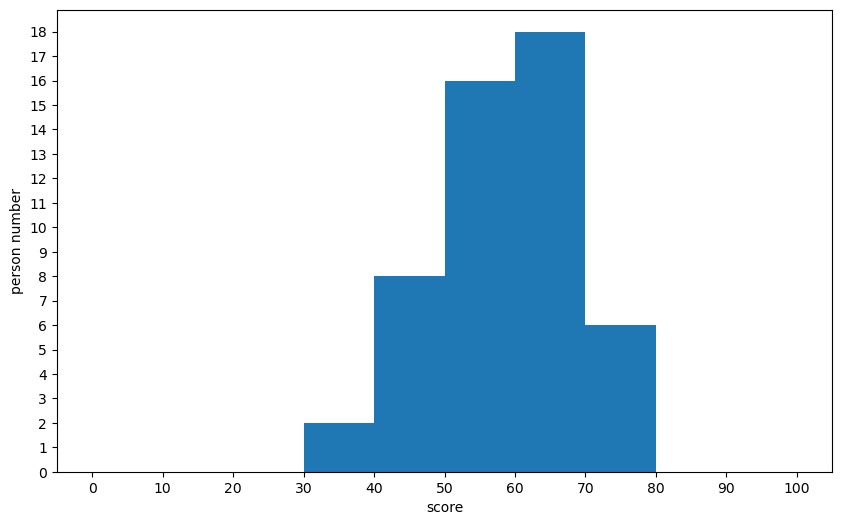

In [47]:
# 히스토그램: 도수분포표를 막대그래프로 표현
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))


freq,_,_ = plt.hist(e_scores,bins=10,range=(0,100))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,10+1)) # 눈금
plt.yticks(np.arange(0,freq.max()+1))


plt.show()

plt.xticks(np.linspace(0,100,10+1))는 plt.xticks() 함수를 이용하여 x축에 표시될 눈금의 위치와 라벨을 설정하는 코드입니다. np.linspace(0,100,10+1)는 0부터 100까지의 범위에서 10+1개의 구간으로 나눈 값을 생성하는 NumPy 함수입니다. 따라서 plt.xticks(np.linspace(0,100,10+1))는 x축의 범위를 0부터 100까지 10+1개의 구간으로 나눈 값을 눈금으로 사용하겠다는 의미입니다. 예를 들어, 0, 10, 20, ..., 90, 100의 값을 눈금으로 사용하게 됩니다.

plt.yticks(np.arange(0,freq.max()+1))는 y축에 표시될 눈금의 위치와 라벨을 설정하는 코드입니다. np.arange(0,freq.max()+1)는 0부터 freq의 최댓값까지 1씩 증가하는 값을 생성하는 NumPy 함수입니다. 따라서 plt.yticks(np.arange(0,freq.max()+1))는 y축의 범위를 0부터 freq의 최댓값까지 1씩 증가하는 값으로 나눈 값을 눈금으로 사용하겠다는 의미입니다. 예를 들어, freq의 최댓값이 10이라면 0, 1, 2, ..., 10의 값을 눈금으로 사용하게 됩니다.

### 과제
클래스별 빈도를 나타내는 히스토그램에 추가하여 누적상대도수(y축 왼쪽이라고 설명하셨는데 오른쪽인듯..)를 꺽은선그래프로 표현하세요.

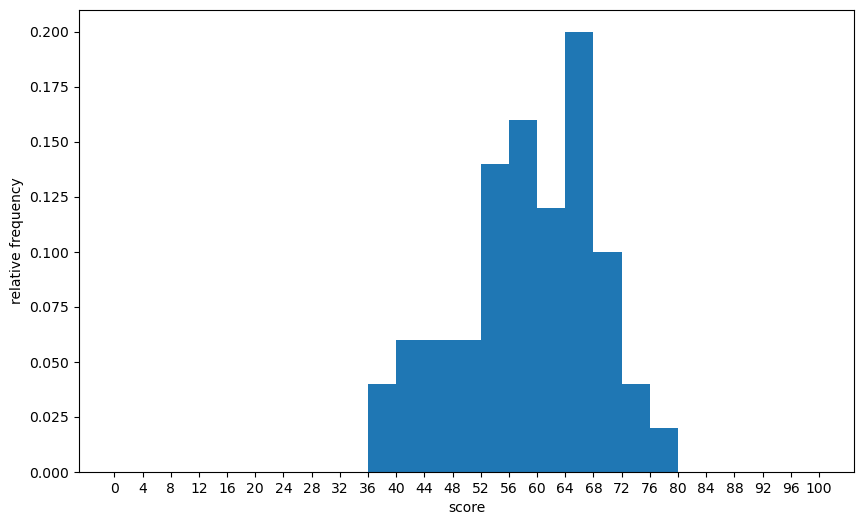

In [48]:
# 선생님 과제 수정본
# 아래 상대도수를 나타내는 히스토그램에 추가하여 누적 상대도수(y축 왼쪽)을 꺾은선 그래프로 표현하세요

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

weights = np.ones_like(e_scores) / len(e_scores) # 가중치 구하는거
rel_freq, _, _ = ax1.hist(e_scores, bins=25,range=(0, 100), weights=weights)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))
plt.show()

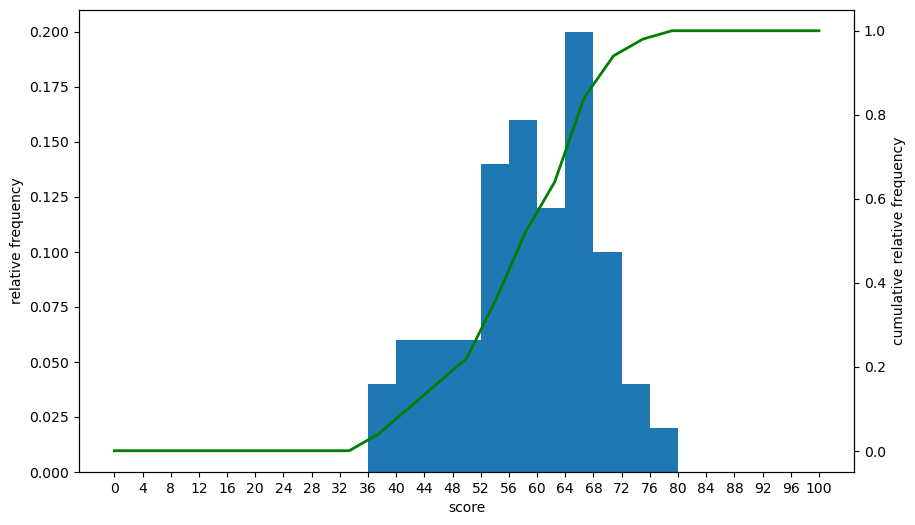

In [49]:
# 슬기
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

weights = np.ones_like(e_scores) / len(e_scores)
rel_freq, _, _ = ax1.hist(e_scores, bins=25, range=(0, 100), weights=weights)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

cum_rel_freq = np.cumsum(rel_freq)
ax2 = ax1.twinx()
ax2.plot(np.linspace(0, 100, 25), cum_rel_freq, color='green', linewidth=2)
ax2.set_ylabel('cumulative relative frequency')
plt.show()

KeyError: 'cumulative_freqency'

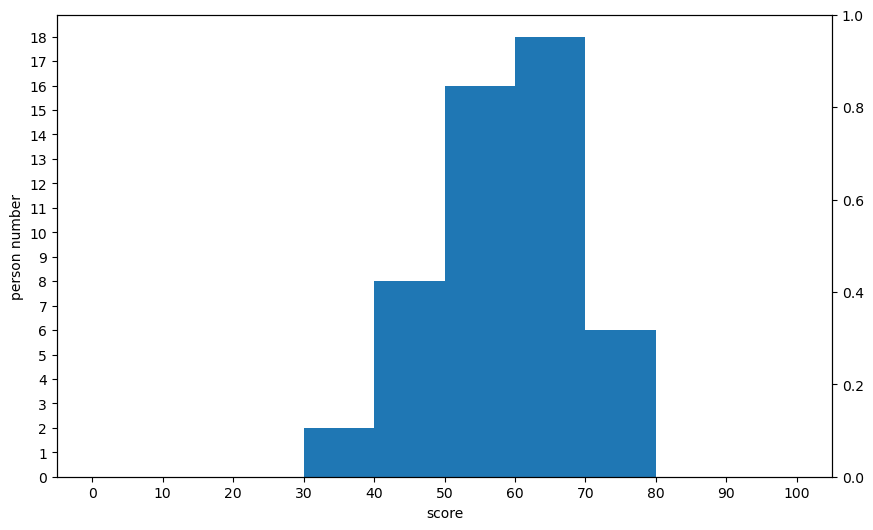

In [51]:
# 나영씨
# 과제(1): 클래스별 빈도를 나타내는 히스토그램에 누적상대도수(cumulative_freqency)를
# (y축 오른쪽에 누적상대도수, 왼쪽엔 그냥 값)추가하여 꺾은 선 그래프로 표현

plt.figure(figsize=(10,6))
freq, _, _ = plt.hist(e_scores, bins=10, range=(0,100))

plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 100, 10+1))
plt.yticks(np.arange(0, freq.max()+1))

ax2=plt.twinx()    # y축 분리된 그래프 따로 만들어서 합치기, X를 그대로 활용하겠다.
x=np.linspace(0, 100, 10)
y=freq_dist_df['cumulative_freqency']
ax2.plot(x,y, color='red', marker='o', markersize=4)

plt.show()

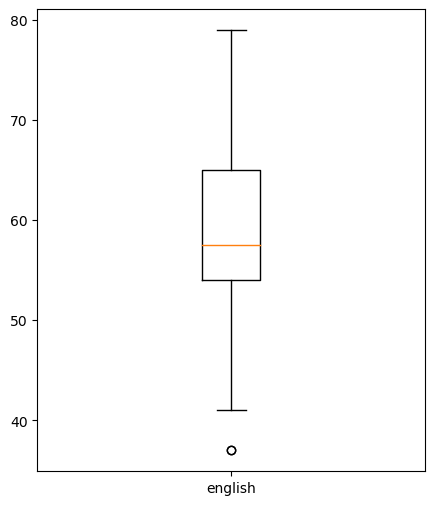

In [113]:
# box plot
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(5,6))
plt.boxplot(e_scores, labels=['english'])
plt.show()

### 과제2
타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 칼럼 중 2개를 선택하여 각 칼럼의 특징을 설명하고 종속변수인 survived와의 관계를 기술하세요.

- 각 컬럼에 대한 전처리 후 기초 통계량, 시각화를 통한 분포 및 특징 탐색, 이상치 여부 탐색
- 선택한 컬럼을 가장 잘 활용할 수 있는 형태로 변환

나영씨꺼 : 이상치 의심할만한게 많았지만 확인해보니 이상치가 아니었다. (age, fare)
통계적으로 이상치라고 해서 다 삭제하거나 그런 건 아니다
휴먼에러라던지.. 항상 가능성으로 두고 확인해봐야한다.

- fare : 가격이 몰려있는 아래쪽부분을 더 펼쳐봐야 한다. 0~50사이가 대부분임을 확인했으니 로그변환을 해서 데이터의 순위는 왜곡하지 않으면서 자세하게 볼 수 있다.

#### 2차원 데이터

In [18]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [19]:
e_scores = np.array(df['english'])[:10]
m_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':e_scores, 'mathematics':m_scores},
                        index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [20]:
# 공분산
# 공분산이 양수인 경우 한 변수가 증가할 때 다른 변수도 증가하는 경향이 있으며, 
# 음수인 경우 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있습니다. 
# 공분산이 0에 가까운 경우 두 변수 사이에는 거의 상관관계가 없다고 볼 수 있습니다.

summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df.english - summary_df.english.mean()
summary_df['mathematics_deviation'] = summary_df.mathematics - summary_df.mathematics.mean()
summary_df #과목별 편차 까쥐

,english,mathematics,english_deviation,mathematics_deviation
student,,,,
A,42,65,-13.0,-6.4
B,69,80,14.0,8.6
C,56,63,1.0,-8.4
D,41,63,-14.0,-8.4
E,57,76,2.0,4.6
F,48,60,-7.0,-11.4
G,65,81,10.0,9.6
H,49,66,-6.0,-5.4
I,65,78,10.0,6.6


In [21]:
summary_df['product of deviation'] = summary_df['english_deviation']*summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [22]:
np.var(scores_df.english)

86.0

In [23]:
summary_df['product of deviation'].mean()

62.8

In [24]:
np.cov(e_scores,m_scores) # 행렬로 나옴 (영어의 분산/공분산
#                                        공분산/ 수학의 분산)

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

In [25]:
np.cov(e_scores,m_scores,ddof=0)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [26]:
# n-1로 나눔
np.cov(e_scores,m_scores,ddof=1) #default

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

In [ ]:
공분산은 방향은 아는데 얼만큼 상관이 있는지 모른다 -> 상관계수 필요!
표준편차로 나눠줘야 함.(영표편x수표편)

In [130]:
# 상관계수
np.cov(e_scores,m_scores,ddof=0)[0,1] / (np.std(e_scores)*np.std(m_scores))

0.8185692341186713

In [131]:
np.corrcoef(e_scores,m_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [132]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


### 과제3
타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 컬럼 중 2개의 쌍을 선택하여 공분산 행렬및 상관계수 행렬을 각각 구하여 비교하세요.

여기서는 연속형이 없기 때문에 빈도분석을 해야한다.
pclass 와 fare -> 두 개는 숫자가 의미를 가지는 상관관계를 가진다.
p: 범주형이면서 숫자가 의미를 가진다 (1,2,3)
f: 요금으로서 숫자의 크기가 있다.


#### 2차원 데이터의 시각화

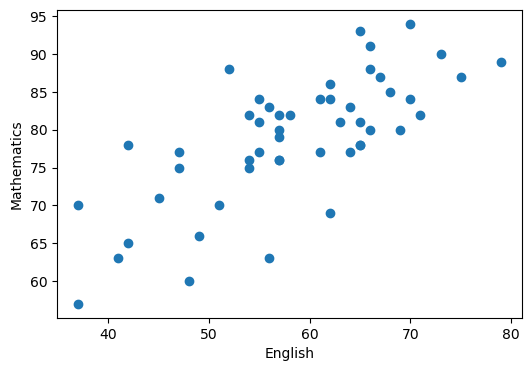

In [58]:
# 영어, 수학 점수로 산점도 그리기
import matplotlib.pyplot as plt
e_scores = np.array(df.english)
m_scores = np.array(df.mathematics)

plt.figure(figsize=(6,4))
plt.scatter(e_scores, m_scores)
plt.xlabel('English')
plt.ylabel('Mathematics')
plt.show()

<AxesSubplot:xlabel='english', ylabel='mathematics'>

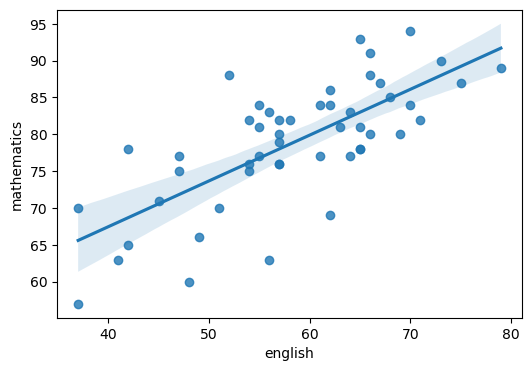

In [63]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='english', y='mathematics')

In [ ]:
# 회귀직선 구하기(지금은 참고만!)
poly_fit = np.polyfit(e_scores,_m_scores,1)
poly_1d = np.poly
 마저적기

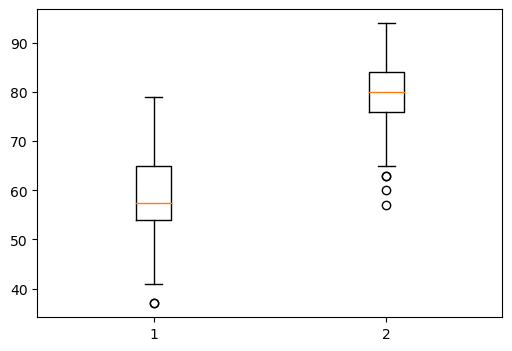

In [68]:
# sns.boxplot(data=df, x='english', y='mathematics') 이상하게 나옴
plt.figure(figsize=(6,4))
plt.boxplot([e_scores,m_scores])
plt.show()
# 두 개의 변수를 동시에 봐서 한 눈에 비교 가능하다(전반적으로 수학이 더 높다. 분포도가 비슷하다)

#### 과제1
english와 math 2차원데이터간의 관계를 파악할 수 있는 시각화를 수행하세요.
히스토그램 -> subplot 사용

<AxesSubplot:>

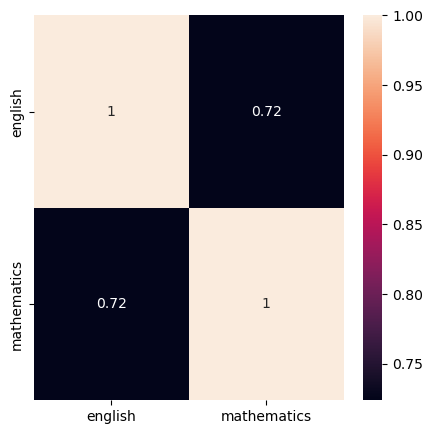

In [71]:
# 히트맵
plt.figure(figsize=(5,5))
sns.heatmap(df[['english', 'mathematics']].corr(),annot=True)

# 위와 비교해보니 결과의 차이 발견.
# [:10] 때문이었음!